In [1]:
import requests
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
r = requests.get('https://api.covid19api.com')
r.text

'{\n  "allRoute": {\n    "Name": "Get All Data",\n    "Description": "Returns all data in the system. Warning: this request returns 8MB+ and takes 5+ seconds",\n    "Path": "/all"\n  },\n  "countriesRoute": {\n    "Name": "Get List Of Countries",\n    "Description": "Returns all countries and associated provinces. The country_slug variable is used for country specific data",\n    "Path": "/countries"\n  },\n  "countryDayOneRoute": {\n    "Name": "Get List Of Cases Per Country Per Province By Case Type From The First Recorded Case",\n    "Description": "Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths",\n    "Path": "/dayone/country/:country"\n  },\n  "countryDayOneTotalRoute": {\n    "Name": "Get List Of Cases Per Country By Case Type From The First Recorded Case",\n    "Description": "Returns all cases by case type for a country from the first recorded case. C

In [2]:
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('https://api.covid19api.com/summary', params=payload)
r.json()

{'Global': {'NewConfirmed': 0,
  'TotalConfirmed': 3660341,
  'NewDeaths': 0,
  'TotalDeaths': 258950,
  'NewRecovered': 0,
  'TotalRecovered': 1157475},
 'Countries': [{'Country': 'ALA Aland Islands',
   'CountryCode': 'AX',
   'Slug': 'ala-aland-islands',
   'NewConfirmed': 0,
   'TotalConfirmed': 0,
   'NewDeaths': 0,
   'TotalDeaths': 0,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 3392,
   'NewDeaths': 0,
   'TotalDeaths': 104,
   'NewRecovered': 0,
   'TotalRecovered': 458,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 832,
   'NewDeaths': 0,
   'TotalDeaths': 31,
   'NewRecovered': 0,
   'TotalRecovered': 595,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Algeria',
   'CountryCode': 'DZ',
   'Slug': 'algeria',
   'N

In [3]:
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('https://api.covid19api.com/summary', params=payload)
r.json()

{'Global': {'NewConfirmed': 0,
  'TotalConfirmed': 3660341,
  'NewDeaths': 0,
  'TotalDeaths': 258950,
  'NewRecovered': 0,
  'TotalRecovered': 1157475},
 'Countries': [{'Country': 'ALA Aland Islands',
   'CountryCode': 'AX',
   'Slug': 'ala-aland-islands',
   'NewConfirmed': 0,
   'TotalConfirmed': 0,
   'NewDeaths': 0,
   'TotalDeaths': 0,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 3392,
   'NewDeaths': 0,
   'TotalDeaths': 104,
   'NewRecovered': 0,
   'TotalRecovered': 458,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 832,
   'NewDeaths': 0,
   'TotalDeaths': 31,
   'NewRecovered': 0,
   'TotalRecovered': 595,
   'Date': '2020-05-08T02:36:04Z'},
  {'Country': 'Algeria',
   'CountryCode': 'DZ',
   'Slug': 'algeria',
   'N

In [4]:
j = json.loads(r.text)

In [5]:
from pandas.io.json import json_normalize
perRegion = json_normalize(j,"Countries")

In [6]:
perRegion

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-05-08T02:36:04Z
1,Afghanistan,AF,afghanistan,0,3392,0,104,0,458,2020-05-08T02:36:04Z
2,Albania,AL,albania,0,832,0,31,0,595,2020-05-08T02:36:04Z
3,Algeria,DZ,algeria,0,4997,0,476,0,2197,2020-05-08T02:36:04Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-05-08T02:36:04Z
...,...,...,...,...,...,...,...,...,...,...
243,Wallis and Futuna Islands,WF,wallis-and-futuna-islands,0,0,0,0,0,0,2020-05-08T02:36:04Z
244,Western Sahara,EH,western-sahara,0,6,0,0,0,5,2020-05-08T02:36:04Z
245,Yemen,YE,yemen,0,25,0,5,0,1,2020-05-08T02:36:04Z
246,Zambia,ZM,zambia,0,146,0,4,0,101,2020-05-08T02:36:04Z


In [7]:
perRegion['Date'] = pd.to_datetime(perRegion['Date'] )
perRegion['Date'].dtypes

datetime64[ns, UTC]

Text(0.5, 1.0, 'Avg Duration Sec per Month')

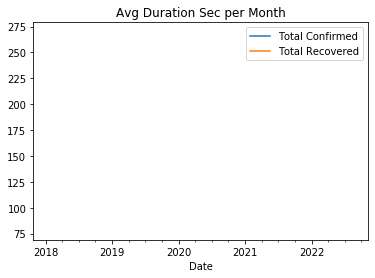

In [8]:
perRegion['Date'] = pd.to_datetime(perRegion['Date'] )
perRegion['Date'].dtypes
perRegion.groupby(perRegion['Date'].dt.to_period("M")).median()['TotalConfirmed'].plot(label='Total Confirmed')
perRegion.groupby(perRegion['Date'].dt.to_period("M")).median()['TotalRecovered'].plot(label='Total Recovered')

plt.legend()
plt.title('Avg Duration Sec per Month')

In [9]:
from pandas.io.json import json_normalize
Global = json_normalize(j)

In [10]:
Global

,Countries,Date,Global.NewConfirmed,Global.TotalConfirmed,Global.NewDeaths,Global.TotalDeaths,Global.NewRecovered,Global.TotalRecovered
0,"[{'Country': 'ALA Aland Islands', 'CountryCode...",2020-05-08T02:36:04Z,0,3660341,0,258950,0,1157475


In [11]:
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
q = requests.get('https://api.covid19api.com/dayone/country/Canada', params=payload)
q.json()

[{'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': 'Ontario',
  'City': '',
  'CityCode': '',
  'Lat': '51.25',
  'Lon': '-85.32',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-26T00:00:00Z'},
 {'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': 'Ontario',
  'City': '',
  'CityCode': '',
  'Lat': '51.25',
  'Lon': '-85.32',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-27T00:00:00Z'},
 {'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': 'Ontario',
  'City': '',
  'CityCode': '',
  'Lat': '51.25',
  'Lon': '-85.32',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-28T00:00:00Z'},
 {'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': 'British Columbia',
  'City': '',
  'CityCode': '',
  'Lat': '49.28',
  'Lon': '-123.12',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-28T00:00:00Z'},
 {'Country': 'Canada',
  '

In [12]:
canada1 = json.loads(q.text)

In [13]:
from pandas.io.json import json_normalize
canada2 = json_normalize(canada1)

In [14]:
canada2[canada2['Recovered']>0]

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
32,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-12T00:00:00Z
36,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-13T00:00:00Z
38,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-14T00:00:00Z
42,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-15T00:00:00Z
44,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-16T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
816,Canada,CA,,,,56.13,-106.35,57925,3683,23814,30428,2020-05-02T00:00:00Z
836,Canada,CA,,,,56.13,-106.35,60503,3794,24921,31788,2020-05-03T00:00:00Z
840,Canada,CA,,,,56.13,-106.35,61956,4002,26030,31924,2020-05-04T00:00:00Z
858,Canada,CA,,,,56.13,-106.35,63214,4189,27006,32019,2020-05-05T00:00:00Z


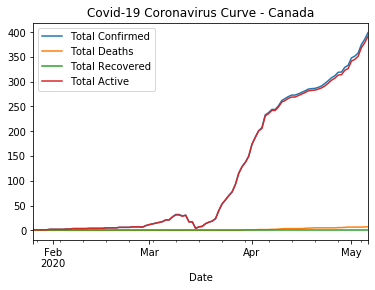

In [15]:
canada2['Date'] = pd.to_datetime(canada2['Date'] )
canada2.groupby(canada2['Date'].dt.to_period("D")).median()['Confirmed'].plot(label='Total Confirmed')
canada2.groupby(canada2['Date'].dt.to_period("D")).median()['Deaths'].plot(label='Total Deaths')
canada2.groupby(canada2['Date'].dt.to_period("D")).median()['Recovered'].plot(label='Total Recovered')
canada2.groupby(canada2['Date'].dt.to_period("D")).median()['Active'].plot(label='Total Active')
plt.legend()
plt.title('Covid-19 Coronavirus Curve - Canada');

In [16]:
canada2 = canada2.replace(np.nan,0)
canada3 = canada2.groupby(['Province'])[['Confirmed','Deaths',"Recovered"]].mean()
canada3 = canada3.reset_index()
canada3 = canada3[canada3['Province']!='']

In [17]:
canada3.groupby(['Province'])[['Confirmed','Deaths',"Recovered"]].cumsum()

,Confirmed,Deaths,Recovered
1,1878.467742,33.258065,0.0
2,694.680000,30.010000,0.0
3,11.854545,0.000000,0.0
4,170.981818,3.127273,0.0
5,79.140351,0.000000,0.0
6,181.207547,1.754717,0.0
7,4.166667,0.000000,0.0
8,457.596154,9.115385,0.0
9,4053.372549,231.303922,0.0
10,19.018868,0.018868,0.0


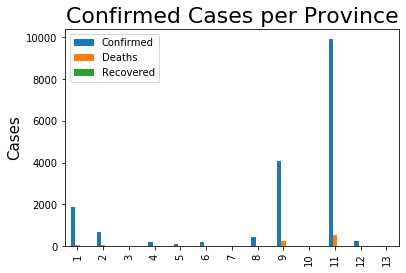

In [18]:
canada2 = canada2.replace(np.nan,0)
canada3 = canada2.groupby(['Province'])[['Confirmed','Deaths',"Recovered"]].mean()
canada3 = canada3.reset_index()
canada3 = canada3[canada3['Province']!='']
ax = canada3.plot(kind='bar');
ax.set_alpha(0.8)
ax.set_title("Confirmed Cases per Province", fontsize=22)
ax.set_ylabel("Cases", fontsize=15);
plt.show()

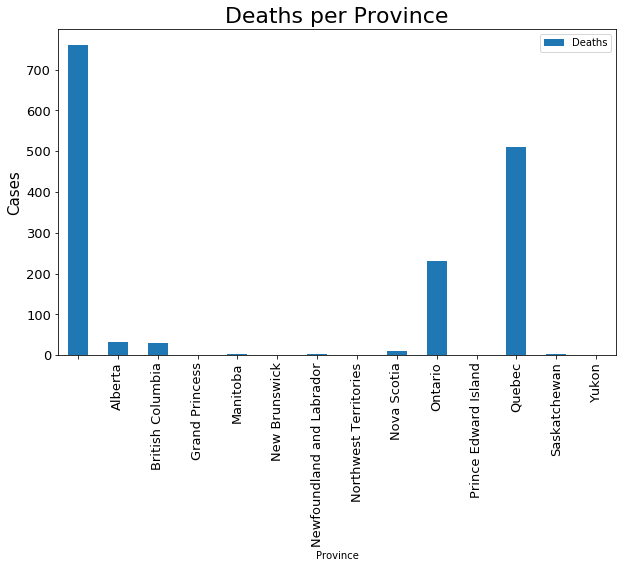

In [19]:
canada2 = canada2.replace(np.nan,0)
canada4 = canada2.groupby(['Province'])[['Deaths']].mean()

ax = canada4.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Deaths per Province", fontsize=22)
ax.set_ylabel("Cases", fontsize=15);
plt.show()

In [20]:
import requests
import json
import pandas as pd 
import numpy as np
from pandas.io.json import json_normalize
import datetime
import plotly.graph_objs as go
import plotly.graph_objects as go
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
q = requests.get('https://api.covid19api.com/dayone/country/Canada', params=payload)
canada1 = json.loads(q.text)
canada2 = json_normalize(canada1)
canada2 = canada2.replace(np.nan,0)
canada3 = canada2.groupby(['Date','Province'])[['Confirmed','Deaths',"Recovered",'Active']].mean()
canada3 = canada3.reset_index()
canada3 = canada3[canada3['Province']!='']
totalStats = canada2[canada2['Recovered']>0]

In [21]:
canada3

,Date,Province,Confirmed,Deaths,Recovered,Active
0,2020-01-26T00:00:00Z,Ontario,1,0,0,1
1,2020-01-27T00:00:00Z,Ontario,1,0,0,1
2,2020-01-28T00:00:00Z,British Columbia,1,0,0,1
3,2020-01-28T00:00:00Z,Ontario,1,0,0,1
4,2020-01-29T00:00:00Z,British Columbia,1,0,0,1
...,...,...,...,...,...,...
877,2020-05-06T00:00:00Z,Ontario,19910,1560,0,18350
878,2020-05-06T00:00:00Z,Prince Edward Island,27,0,0,27
879,2020-05-06T00:00:00Z,Quebec,34334,2511,0,31823
880,2020-05-06T00:00:00Z,Saskatchewan,512,7,0,505


In [22]:

canada4 = canada3.copy()
canada4['Date'] = pd.to_datetime(canada4['Date'])
canada4['day'] = canada4['Date'].dt.day_name()

In [23]:
canada4 = canada4[canada4['Date']=='2020-05-04']

In [24]:
canada4

,Date,Province,Confirmed,Deaths,Recovered,Active,day
841,2020-05-04 00:00:00+00:00,Alberta,5836,104,0,5732,Monday
842,2020-05-04 00:00:00+00:00,British Columbia,2224,117,0,2107,Monday
843,2020-05-04 00:00:00+00:00,Grand Princess,13,0,0,13,Monday
844,2020-05-04 00:00:00+00:00,Manitoba,283,6,0,277,Monday
845,2020-05-04 00:00:00+00:00,New Brunswick,118,0,0,118,Monday
846,2020-05-04 00:00:00+00:00,Newfoundland and Labrador,259,3,0,256,Monday
847,2020-05-04 00:00:00+00:00,Northwest Territories,5,0,0,5,Monday
848,2020-05-04 00:00:00+00:00,Nova Scotia,985,38,0,947,Monday
849,2020-05-04 00:00:00+00:00,Ontario,19097,1446,0,17651,Monday
850,2020-05-04 00:00:00+00:00,Prince Edward Island,27,0,0,27,Monday


In [46]:

graph_one=[]
import plotly.graph_objects as go
graph_one = go.Figure()

graph_one.add_trace(
    go.Scatter(
        x=canada4['Province'],
        y=canada4['Deaths'],
        name="Deaths"
    ))

graph_one.add_trace(
    go.Bar(
        x=canada4['Province'],
        y=canada4['Confirmed'],
        name="Confirmed"
    ))
graph_one.update_layout(title_text='Confirmed vs Death Cases ' + str(datetime.datetime.today().date()), title_x=0.5)
graph_one.update_xaxes(title_text='Province')
graph_one.update_yaxes(title_text='Cases')
graph_one.show()

In [51]:
graph_one = []
canada5 =  canada2[canada2['Province']=='']
canada5['Date'] =  pd.to_datetime(canada5['Date'] )
canada5 = canada5[canada5['Date']=='2020-05-04']
conf = canada5['Confirmed'].values
conf2 = canada5['Active'].values
conf3 = canada5['Deaths'].values
import plotly.graph_objects as go
graph_one = go.Figure()
graph_one.add_trace(
        go.Indicator(
        value = conf[0],
        delta = {'reference': 160},
        gauge = {'axis': {'visible': False}},
        title = {'text': "Confirmed"},
        domain = {'row': 0, 'column': 0}))


graph_one.add_trace(
        go.Indicator(
        mode = "number",
        value = conf2[0],
        title = {'text': "Active"},
        domain = {'row': 0, 'column': 1}))

graph_one.add_trace(go.Indicator(
        mode = "delta",
        value = -conf3[0],
        title = {'text': "Deaths"},
        domain = {'row': 0, 'column': 2}))

graph_one.update_layout(
        grid = {'rows': 1, 'columns': 3, 'pattern': "independent"},
        template = {'data' : {'indicator': [{

            'mode' : "number+delta+gauge",
            'delta' : {'reference': 90}}]
                             }})

layout_one = dict(title = 'Current State of Coronavirus in Canada'
            )

layout_one = dict(
            xaxis = dict(title = 'Date',),
            yaxis = dict(title = 'Cases'),
            )
graph_one.show()

In [49]:
canada5

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
32,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-12T00:00:00Z
36,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-13T00:00:00Z
38,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-14T00:00:00Z
42,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-15T00:00:00Z
44,Canada,CA,,,,56.13,-106.35,7,0,1,6,2020-02-16T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
816,Canada,CA,,,,56.13,-106.35,57925,3683,23814,30428,2020-05-02T00:00:00Z
836,Canada,CA,,,,56.13,-106.35,60503,3794,24921,31788,2020-05-03T00:00:00Z
840,Canada,CA,,,,56.13,-106.35,61956,4002,26030,31924,2020-05-04T00:00:00Z
858,Canada,CA,,,,56.13,-106.35,63214,4189,27006,32019,2020-05-05T00:00:00Z


In [26]:
globe = requests.get('https://api.covid19api.com/live/country/Canada', params=payload)


In [27]:
globe1 = json.loads(globe.text)
globe2 = json_normalize(globe1)
globe2 = globe2.replace(np.nan,0)

In [28]:
globe2[globe2['Province']=='Quebec']

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
7,Canada,CA,Quebec,,,52.94,-73.55,12846,328,0,12518,2020-04-13T00:00:00Z
14,Canada,CA,Quebec,,,52.94,-73.55,13557,360,0,13197,2020-04-14T00:00:00Z
34,Canada,CA,Quebec,,,52.94,-73.55,14248,435,0,13813,2020-04-15T00:00:00Z
45,Canada,CA,Quebec,,,52.94,-73.55,14860,487,0,14373,2020-04-16T00:00:00Z
53,Canada,CA,Quebec,,,52.94,-73.55,15857,630,0,15227,2020-04-17T00:00:00Z
71,Canada,CA,Quebec,,,52.94,-73.55,16798,688,0,16110,2020-04-18T00:00:00Z
78,Canada,CA,Quebec,,,52.94,-73.55,17521,688,0,16833,2020-04-19T00:00:00Z
94,Canada,CA,Quebec,,,52.94,-73.55,17950,820,0,17130,2020-04-20T00:00:00Z
105,Canada,CA,Quebec,,,52.94,-73.55,19319,939,0,18380,2020-04-21T00:00:00Z
115,Canada,CA,Quebec,,,52.94,-73.55,20126,1044,0,19082,2020-04-22T00:00:00Z


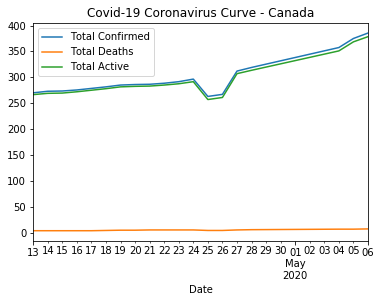

In [29]:
globe2['Date'] = pd.to_datetime(globe2['Date'] )
globe2.groupby(globe2['Date'].dt.to_period("D")).median()['Confirmed'].plot(label='Total Confirmed')
globe2.groupby(globe2['Date'].dt.to_period("D")).median()['Deaths'].plot(label='Total Deaths')
globe2.groupby(globe2['Date'].dt.to_period("D")).median()['Active'].plot(label='Total Active')
plt.legend()
plt.title('Covid-19 Coronavirus Curve - Canada');

In [30]:
globe3 = globe3[globe3['Province']!="Quebec"]
globe3.groupby(globe3['Date'].dt.to_period("D")).median()['Confirmed'].plot(label='Total Confirmed')
globe3.groupby(globe3['Date'].dt.to_period("D")).median()['Deaths'].plot(label='Total Deaths')
globe3.groupby(globe3['Date'].dt.to_period("D")).median()['Recovered'].plot(label='Total Recovered')
globe3.groupby(globe3['Date'].dt.to_period("D")).median()['Active'].plot(label='Total Active')
plt.legend()
plt.title('Covid-19 Coronavirus Curve - Canada  - Excluding Quebec');

NameError: name 'globe3' is not defined

In [ ]:
random_y0 = globe2['Confirmed']
random_y1 = globe2['Deaths']
random_y2 = globe2['Active']

# Create traces
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= globe2['Province'], y=random_y0,
                    mode='lines',
                    name='lines'))
fig2.add_trace(go.Scatter(x=globe2['Province'], y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig2.add_trace(go.Scatter(x=globe2['Province'], y=random_y2,
                    mode='markers', name='markers'))

fig2.show()

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=canada4['Province'], y=canada4['Confirmed']),
    go.Bar(name='Deaths', x=canada4['Province'], y=canada4['Deaths']),
    go.Bar(name='Active', x=canada4['Province'], y=canada4['Active'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
canada4